# Template Notebook

## Setup

### Standard library imports

In [2]:
%load_ext autoreload

In [3]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

In [11]:
%autoreload 2

import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from source.spea_optimizer import SPEAOptimizer
from source.objectives import viennet_objective

In [5]:
sns.set()

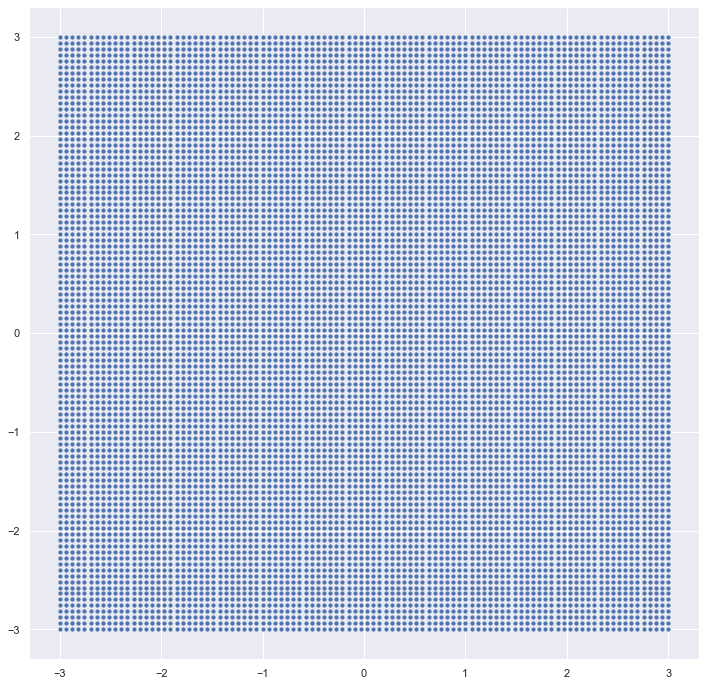

In [7]:
plt.figure(figsize=[12, 12])

x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100), sparse=False, indexing='xy')
plt.scatter(x, y, c="b", s=10)

In [9]:
grid = np.array([x, y])
grid = grid.reshape(2, 100*100)
grid = np.swapaxes(grid, 0, 1)
grid.shape

(10000, 2)

In [17]:
%matplotlib widget

figure = plt.figure(figsize=[12, 12])
axes = figure.add_subplot(111, projection='3d')

values = np.apply_along_axis(viennet_objective, 1, grid)
axes.scatter(values[:, 0], values[:, 1], values[:, 2], c="r", s=5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
optimzier = SPEAOptimizer(
    objective,
    n_dim=30,
    mode="min",
    mutation_operator="gaussian",
    crossover_operator="center",
    selection_operator="binary_tournament",
    clustering_method="mean_shift"
)

In [25]:
history = optimzier.optimize(
    generations=1000,
    population_size=100,
    crossover_rate=0.8,
    mutation_rate=0.2,
    reducing_period=10,
    search_range=((-1, 1),),
    mutation_strength=0.1,
    clustering_parameters={"max_iter": 50},
    silent=False,
    mutation_schedule="const",
    crossover_schedule="const",
    strength_schedule="const",
    logging=False,
    logging_path="../data/zdt_n1.csv",
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:12<00:00,  1.32s/it]


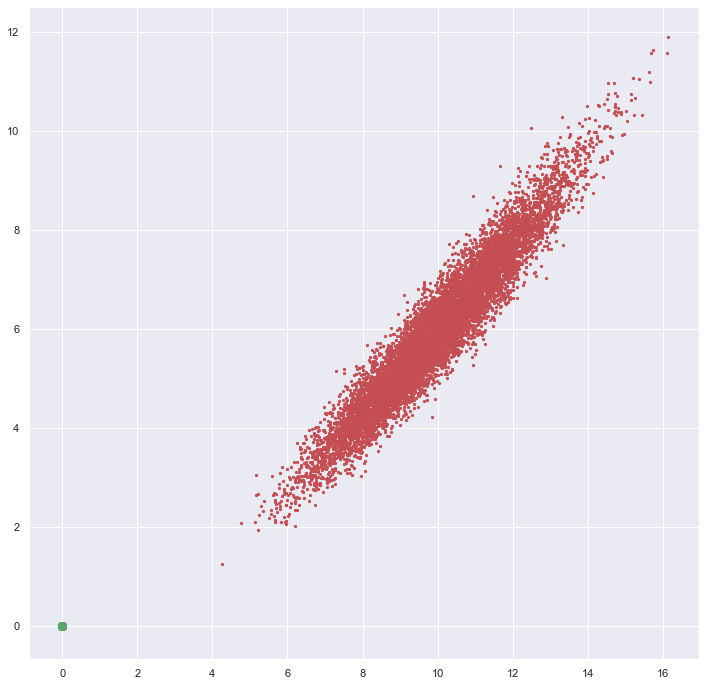

In [26]:
plt.figure(figsize=[12, 12])

pareto_values = np.apply_along_axis(objective, 1, optimzier.pareto_front)

plt.scatter(values[:, 0], values[:, 1], c="r", s=5)
plt.scatter(pareto_values[:, 0], pareto_values[:, 1], c="g", s=60)

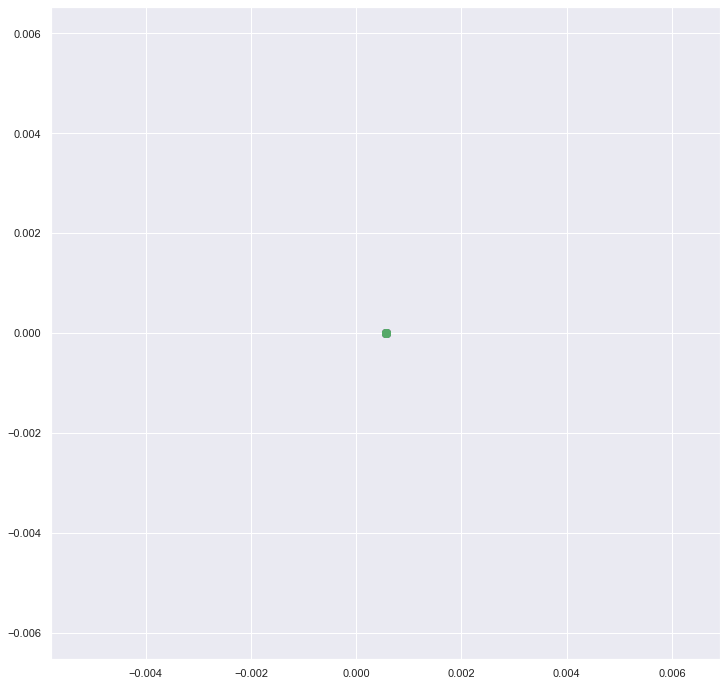

In [29]:
plt.figure(figsize=[12, 12])

plt.scatter(pareto_values[:, 0], pareto_values[:, 1], c="g", s=60)